In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Preprocessing

In [4]:
df2 = df.drop(columns=['gameId'])

In [5]:
df2.corr().round(decimals=2)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,1.00,0.00,0.04,0.20,0.34,-0.34,0.28,0.22,0.21,0.09,...,-0.10,-0.41,-0.35,-0.39,-0.21,-0.11,-0.51,-0.49,-0.21,-0.41
blueWardsPlaced,0.00,1.00,0.03,0.00,0.02,-0.00,0.03,0.02,0.02,0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.02,-0.03,-0.01,-0.01
blueWardsDestroyed,0.04,0.03,1.00,0.02,0.03,-0.07,0.07,0.04,0.04,0.02,...,-0.02,-0.07,-0.06,-0.06,0.04,-0.04,-0.08,-0.08,0.04,-0.07
blueFirstBlood,0.20,0.00,0.02,1.00,0.27,-0.25,0.23,0.15,0.13,0.08,...,-0.07,-0.30,-0.18,-0.19,-0.16,-0.02,-0.38,-0.24,-0.16,-0.30
blueKills,0.34,0.02,0.03,0.27,1.00,0.00,0.81,0.18,0.17,0.08,...,-0.08,-0.16,-0.41,-0.46,-0.47,-0.21,-0.65,-0.58,-0.47,-0.16
blueDeaths,-0.34,-0.00,-0.07,-0.25,0.00,1.00,-0.03,-0.20,-0.19,-0.10,...,0.16,0.89,0.43,0.46,-0.04,-0.10,0.64,0.58,-0.04,0.89
blueAssists,0.28,0.03,0.07,0.23,0.81,-0.03,1.00,0.15,0.17,0.03,...,-0.06,-0.13,-0.36,-0.40,-0.34,-0.16,-0.55,-0.44,-0.34,-0.13
blueEliteMonsters,0.22,0.02,0.04,0.15,0.18,-0.20,0.15,1.00,0.78,0.64,...,-0.05,-0.22,-0.17,-0.19,-0.07,-0.09,-0.28,-0.26,-0.07,-0.22
blueDragons,0.21,0.02,0.04,0.13,0.17,-0.19,0.17,0.78,1.00,0.02,...,-0.03,-0.19,-0.15,-0.16,-0.06,-0.10,-0.23,-0.21,-0.06,-0.19
blueHeralds,0.09,0.01,0.02,0.08,0.08,-0.10,0.03,0.64,0.02,1.00,...,-0.04,-0.11,-0.09,-0.11,-0.05,-0.02,-0.16,-0.16,-0.05,-0.11


#### Red team stats are redundant, so they are eliminated. We may only use blue team data to determine match results.

In [6]:
df2 = df2.drop(columns=['redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 
                       'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 
                       'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'])

In [7]:
df2

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [8]:
df2['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [10]:
df2.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


In [11]:
df2.corr().round(decimals=2)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
blueWins,1.00,0.00,0.04,0.20,0.34,-0.34,0.28,0.22,0.21,0.09,0.12,0.42,0.36,0.40,0.22,0.13,0.51,0.49,0.22,0.42
blueWardsPlaced,0.00,1.00,0.03,0.00,0.02,-0.00,0.03,0.02,0.02,0.01,0.01,0.02,0.03,0.03,-0.03,0.01,0.02,0.03,-0.03,0.02
blueWardsDestroyed,0.04,0.03,1.00,0.02,0.03,-0.07,0.07,0.04,0.04,0.02,-0.01,0.06,0.06,0.07,0.11,-0.02,0.08,0.08,0.11,0.06
blueFirstBlood,0.20,0.00,0.02,1.00,0.27,-0.25,0.23,0.15,0.13,0.08,0.08,0.31,0.18,0.19,0.13,0.02,0.38,0.24,0.13,0.31
blueKills,0.34,0.02,0.03,0.27,1.00,0.00,0.81,0.18,0.17,0.08,0.18,0.89,0.43,0.47,-0.03,-0.11,0.65,0.58,-0.03,0.89
blueDeaths,-0.34,-0.00,-0.07,-0.25,0.00,1.00,-0.03,-0.20,-0.19,-0.10,-0.07,-0.16,-0.41,-0.46,-0.47,-0.23,-0.64,-0.58,-0.47,-0.16
blueAssists,0.28,0.03,0.07,0.23,0.81,-0.03,1.00,0.15,0.17,0.03,0.12,0.75,0.29,0.30,-0.06,-0.13,0.55,0.44,-0.06,0.75
blueEliteMonsters,0.22,0.02,0.04,0.15,0.18,-0.20,0.15,1.00,0.78,0.64,0.17,0.24,0.20,0.23,0.12,0.20,0.28,0.26,0.12,0.24
blueDragons,0.21,0.02,0.04,0.13,0.17,-0.19,0.17,0.78,1.00,0.02,0.04,0.19,0.16,0.18,0.09,0.16,0.23,0.21,0.09,0.19
blueHeralds,0.09,0.01,0.02,0.08,0.08,-0.10,0.03,0.64,0.02,1.00,0.22,0.15,0.13,0.15,0.08,0.12,0.16,0.16,0.08,0.15


In [12]:
cmap = sns.choose_diverging_palette(as_cmap=False)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

#### When it comes to blue team winning a match, most impactful stats are total gold, total experience, and gold and experience difference over (or under) red team. First Bloods and Team Average level are also relevant stats.

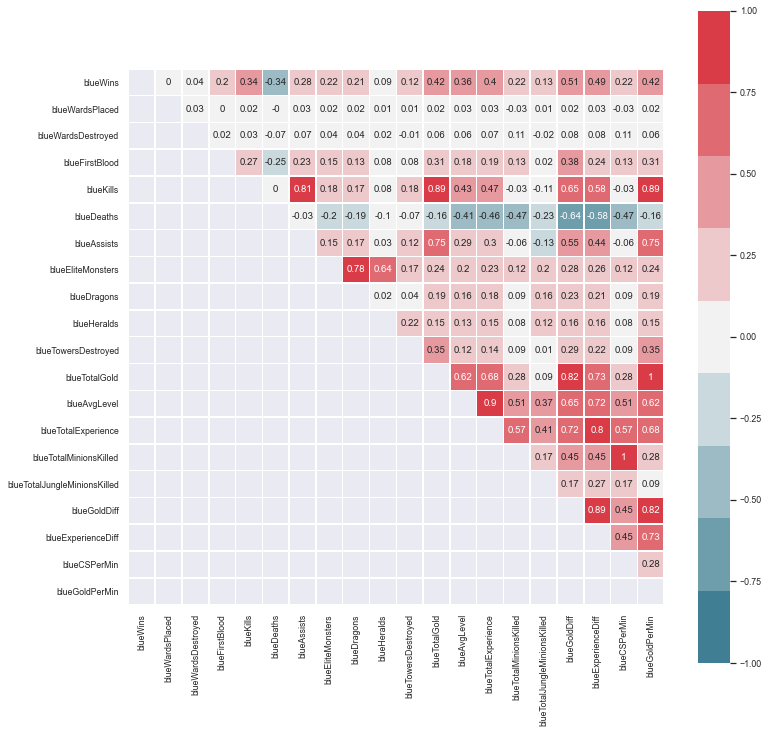

In [13]:
sns.set(font_scale=0.8)
Mxcorr = df2.corr().round(decimals=2)
mask = np.tril(np.ones_like(Mxcorr, dtype=np.bool))
ax = plt.figure(figsize=(12,12))

heatmap = sns.heatmap(Mxcorr.round(decimals=2), cmap=cmap, mask=mask, linewidths=.5,
                      vmin=-1, vmax=1, square=True, annot=True)

In [14]:
df2.groupby('blueWins')['blueFirstBlood'].value_counts()

blueWins  blueFirstBlood
0         0                 2949
          1                 2000
1         1                 2987
          0                 1943
Name: blueFirstBlood, dtype: int64

#### In matches that blue team won, it gets around 60% of first bloods. When it loses, the percentage is down to 40%.

In [15]:
df2.groupby('blueWins')['blueFirstBlood'].mean()

blueWins
0    0.404122
1    0.605882
Name: blueFirstBlood, dtype: float64

Text(0, 0.5, 'First Blood count')

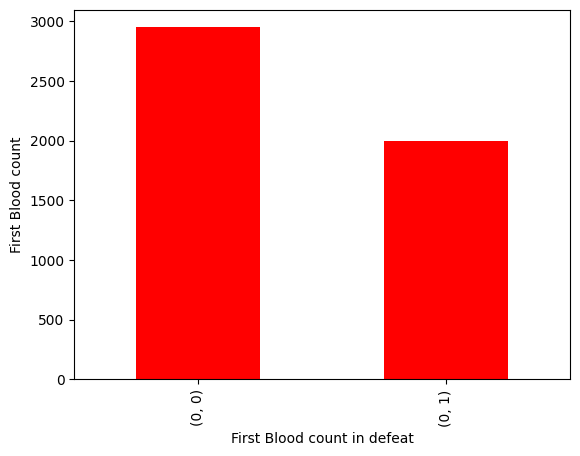

In [26]:
df3 = df2[df2['blueWins']==0]
df3.groupby('blueWins')['blueFirstBlood'].value_counts().plot.bar(color='red')
plt.xlabel("First Blood count in defeat")
plt.ylabel("First Blood count")

Text(0, 0.5, 'First Blood count')

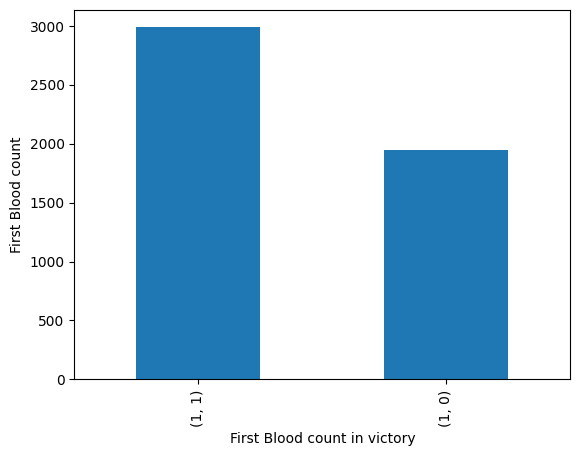

In [33]:
df4 = df2[df2['blueWins']==1]
df4.groupby('blueWins')['blueFirstBlood'].value_counts().plot.bar()
plt.xlabel("First Blood count in victory")
plt.ylabel("First Blood count")

#### Blue team average level varies from 4.6 to 8.0.

In [18]:
df2['blueAvgLevel'].value_counts(ascending=True)

4.6       1
4.8       1
5.2       2
8.0       2
5.4       3
5.6       4
5.8      13
7.8      28
6.0      43
7.6     174
6.2     175
6.4     578
7.4     684
6.6    1339
7.2    1779
6.8    2442
7.0    2611
Name: blueAvgLevel, dtype: int64

In [19]:
df2.groupby('blueWins')['blueAvgLevel'].value_counts()

blueWins  blueAvgLevel
0         6.8             1378
          7.0             1170
          6.6              969
          7.2              587
          6.4              470
          6.2              152
          7.4              136
          6.0               40
          7.6               22
          5.8               13
          5.6                4
          5.4                3
          5.2                2
          4.6                1
          4.8                1
          8.0                1
1         7.0             1441
          7.2             1192
          6.8             1064
          7.4              548
          6.6              370
          7.6              152
          6.4              108
          7.8               28
          6.2               23
          6.0                3
          8.0                1
Name: blueAvgLevel, dtype: int64

#### This graph shows that blue team average level is 6.8 in most matches that were lost, and that the team can finish the 10 minutes which this dataset covers for each match with average team level as low as 4.5.

Text(0.5, 0, 'Average Level')

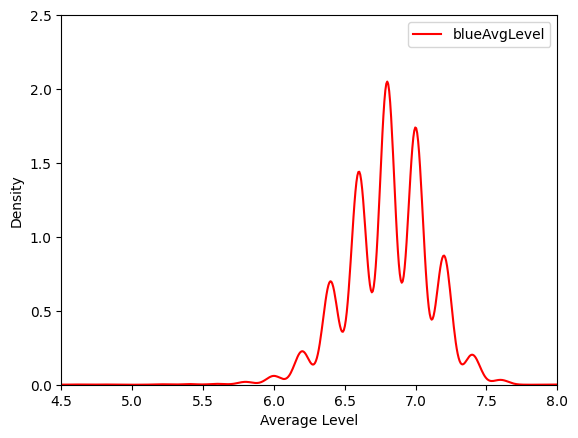

In [93]:
df3 = df2[df2['blueWins']==0]
df3.sort_values(by='blueAvgLevel')
plt.rcdefaults()
#df5.groupby('blueWins')['blueAvgLevel'].value_counts().plot.density(color='red')
df3.plot.density(y='blueAvgLevel',xlim=[4.5,8], ylim=[0,2.5], color='red')
plt.xlabel("Average Level")
#plt.ylabel("Average Level count in defeat")

#### The average level for won matches is 7.0 during the first 10 minutes, and the lowest team average level is 6.0. From this data, the team is guaranteed to lose a match if its average level is lower than 6.0.

Text(0.5, 0, 'Average Level')

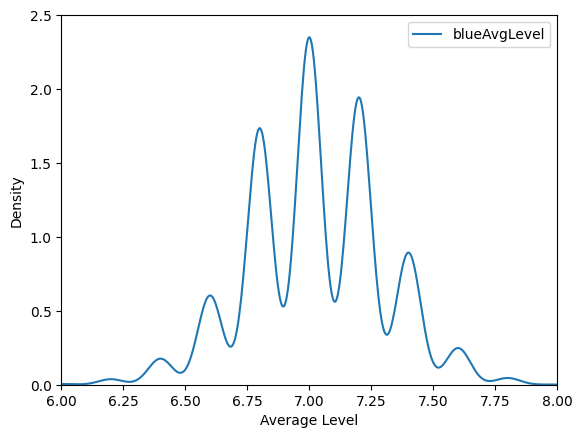

In [105]:
df4 = df2[df2['blueWins']==1]
df4.sort_values(by='blueAvgLevel')
plt.rcdefaults()
#df6.groupby('blueWins')['blueAvgLevel'].value_counts().plot.barh()
df4.plot.density(y='blueAvgLevel',xlim=[6,8], ylim=[0,2.5])
plt.xlabel("Average Level")
#plt.ylabel("Average Level count in victory")

#### Average levels for both victory and defeat. Number one is for blue team wins and 0 for blue team losses.

In [22]:
df2.groupby('blueWins')['blueAvgLevel'].mean()

blueWins
0    6.807032
1    7.025396
Name: blueAvgLevel, dtype: float64

#### On both defeat and victory, average blue team total gold is roughly the same. It can also be told, though, that if the team has total gold lower than 10000, it will lose, and that if the team has total gold over 25000, it will win.

Text(0.5, 0, 'Total Gold in victory')

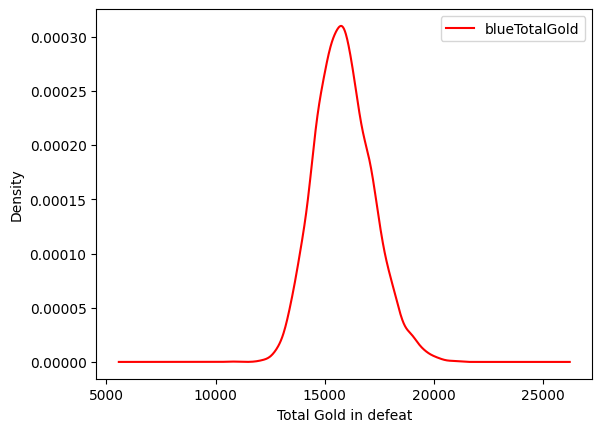

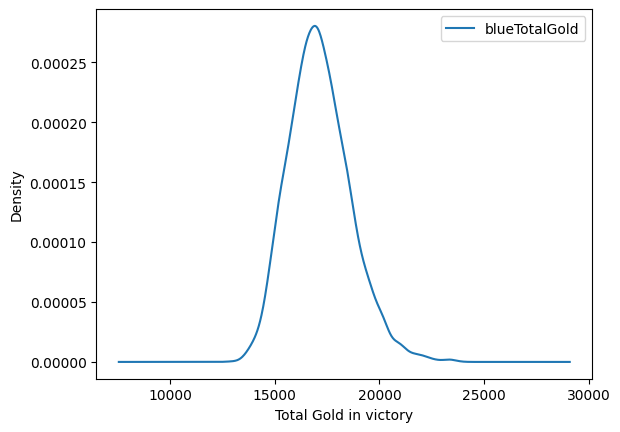

In [108]:
df3.sort_values(by='blueTotalGold')
plt.rcdefaults()
df3.plot.density(y='blueTotalGold', color='red')
plt.xlabel("Total Gold in defeat")

df4.sort_values(by='blueTotalGold')
plt.rcdefaults()
df4.plot.density(y='blueTotalGold')
plt.xlabel("Total Gold in victory")

#### This can also be observed in gold difference and xp difference histograms below.

In [97]:
df3.groupby('blueWins')['blueGoldDiff'].mean()

blueWins
0   -1237.06668
Name: blueGoldDiff, dtype: float64

#### Blue team wins if it has more than 6000 gold over red team and loses if red team has that advantage (6000+ over).

Text(0.5, 0, 'Gold Difference in defeat')

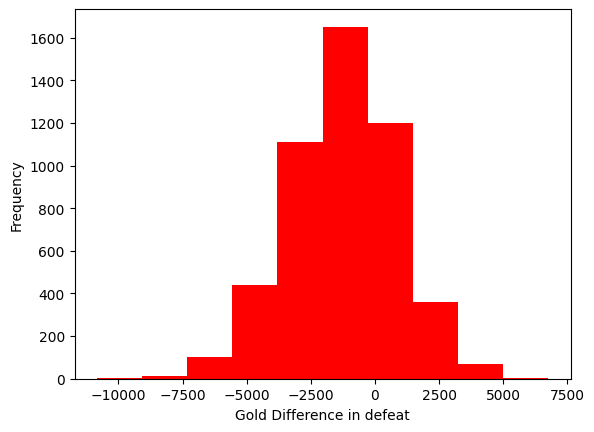

In [98]:
df3.groupby('blueWins')['blueGoldDiff'].plot.hist(color='red')
plt.xlabel("Gold Difference in defeat")

In [99]:
df4.groupby('blueWins')['blueGoldDiff'].mean()

blueWins
1    1270.718053
Name: blueGoldDiff, dtype: float64

Text(0.5, 0, 'Gold Difference in victory')

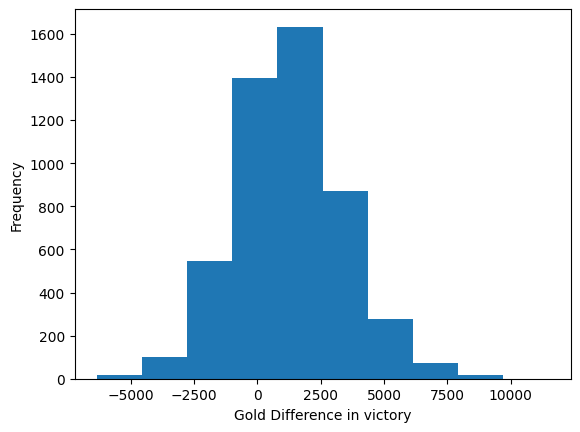

In [100]:
df4.groupby('blueWins')['blueGoldDiff'].plot.hist()
plt.xlabel("Gold Difference in victory")

#### XP-difference-wise - blue team wins when it has more than 5000 experience over red team, and loses when red team has that advantage.

In [101]:
df3.groupby('blueWins')['blueExperienceDiff'].mean()

blueWins
0   -971.898969
Name: blueExperienceDiff, dtype: float64

Text(0.5, 0, 'XP Difference in defeat')

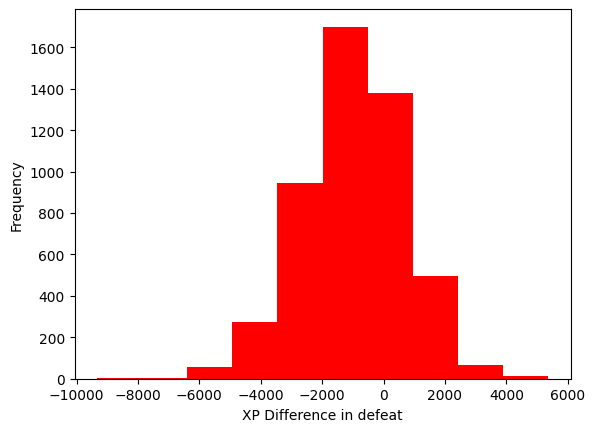

In [102]:
df3.groupby('blueWins')['blueExperienceDiff'].plot.hist(color='red')
plt.xlabel("XP Difference in defeat")

In [103]:
df4.groupby('blueWins')['blueExperienceDiff'].mean()

blueWins
1    908.274442
Name: blueExperienceDiff, dtype: float64

Text(0.5, 0, 'Gold Difference in victory')

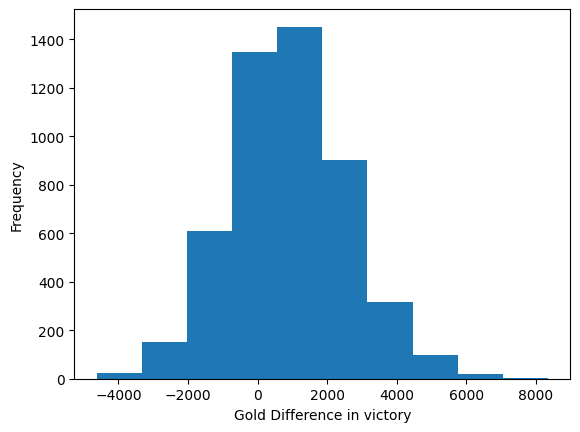

In [104]:
df4.groupby('blueWins')['blueExperienceDiff'].plot.hist()
plt.xlabel("Gold Difference in victory")

#### There is so much data, but it is still inconclusive what really determines match results. More data would be required, like bans and champions selected (matchups and meta champions per se), items built etc. Luck is also a determinant factor, but cannot be measured.